In [1]:
from typing import Callable

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from tqdm import tqdm

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
def tuning_classifier(
        X_train: np.array,
        y_train: np.array,
        X_valid: np.array,
        y_valid: np.array,
        estimator: Callable = KNeighborsClassifier(),
        parameter: str = 'n_neighbors',
        min_n: int = 2,
        max_n: int = 120,
        step: int = 1,
        set_parameter: int or None = None
):
    """
    Tuning hyperparameters for sklearn estimators
    :param X_train: training data
    :param y_train: training labels
    :param X_valid: validation data
    :param y_valid: validation labels
    :param estimator: estimator to be tuned
    :param parameter: parameter to be tuned
    :param min_n: minimum value of parameter
    :param max_n: maximum value of parameter
    :param step: step size for parameter
    :param set_parameter: final value of parameter for building final model
    :return: estimator with optimal parameter
    """
    if set_parameter:
        setattr(estimator, parameter, set_parameter)
        estimator.fit(X_train, y_train)
        return estimator

    else:
        metrics = ['precision', 'recall', 'f1', 'accuracy']
        test_error_rates = {metric: [] for metric in metrics}
        total_test_error_rates = {}

        for i in tqdm(np.arange(min_n, max_n, step), desc=f"Checking model for {parameter}"):
            setattr(estimator, parameter, i)
            estimator.fit(X_train, y_train)
            y_pred_valid = estimator.predict(X_valid)

            accuracy = accuracy_score(y_valid, y_pred_valid)
            precision = precision_score(y_valid, y_pred_valid)
            recall = recall_score(y_valid, y_pred_valid)
            f1 = f1_score(y_valid, y_pred_valid)
            total = accuracy + precision + recall + f1

            test_error_rates['accuracy'].append(accuracy)
            test_error_rates['precision'].append(precision)
            test_error_rates['recall'].append(recall)
            test_error_rates['f1'].append(f1)
            total_test_error_rates[i] = total

        fig, axs = plt.subplots(2, 2, figsize=(10, 10))
        axs = axs.flatten()

        best_metric_summary = {metric: max(test_error_rates[metric]) for metric in metrics}
        best_metric = max(best_metric_summary, key=best_metric_summary.get)
        best_metric_value = best_metric_summary[best_metric]
        best_parameter = np.arange(min_n, max_n, step)[test_error_rates[best_metric].index(best_metric_value)]
        best_optimal_parameter = max(total_test_error_rates, key=total_test_error_rates.get)

        print(f"Best {best_metric} value: {best_metric_value} with {parameter} value: {best_parameter}")
        print(f"Best optimal {parameter} value: {best_optimal_parameter}")

        axs[0].plot(np.arange(min_n, max_n, step), test_error_rates['precision'])
        axs[0].axvline(x=best_optimal_parameter, color='red', linestyle='--', label=f'Best {parameter}')
        axs[0].set_ylabel('precision')
        axs[0].set_xlabel(f'{parameter}')
        axs[0].grid(True)

        axs[1].plot(np.arange(min_n, max_n, step), test_error_rates['recall'])
        axs[1].axvline(x=best_optimal_parameter, color='red', linestyle='--', label=f'Best {parameter}')
        axs[1].set_ylabel('recall')
        axs[1].set_xlabel(f'{parameter}')
        axs[1].grid(True)

        axs[2].plot(np.arange(min_n, max_n, step), test_error_rates['f1'])
        axs[2].axvline(x=best_optimal_parameter, color='red', linestyle='--', label=f'Best {parameter}')
        axs[2].set_ylabel('f1')
        axs[2].set_xlabel(f'{parameter}')
        axs[2].grid(True)

        axs[3].plot(np.arange(min_n, max_n, step), test_error_rates['accuracy'])
        axs[3].axvline(x=best_optimal_parameter, color='red', linestyle='--', label=f'Best {parameter}')
        axs[3].set_ylabel('accuracy')
        axs[3].set_xlabel(f'{parameter}')
        axs[3].grid(True)

        plt.tight_layout()
        plt.show()


def tuning_regressor(
        X_train: np.array,
        y_train: np.array,
        X_valid: np.array,
        y_valid: np.array,
        estimator: Callable = KNeighborsRegressor(),
        parameter: str = 'n_neighbors',
        min_n: int = 2,
        max_n: int = 120,
        step: int = 1,
        set_parameter: int or None = None
):
    """
    Tuning hyperparameters for sklearn regression estimators
    :param X_train: training data
    :param y_train: training labels
    :param X_valid: validation data
    :param y_valid: validation labels
    :param estimator: estimator to be tuned
    :param parameter: parameter to be tuned
    :param min_n: minimum value of parameter
    :param max_n: maximum value of parameter
    :param step: step size for parameter
    :param set_parameter: final value of parameter for building the final model
    :return: estimator with optimal parameter
    """
    if set_parameter:
        setattr(estimator, parameter, set_parameter)
        estimator.fit(X_train, y_train)
        return estimator

    else:
        metrics = ['mean_absolute_error', 'mean_squared_error', 'r2_score', 'median_absolute_error']
        test_error_rates = {metric: [] for metric in metrics}
        total_test_error_rates = {}

        for i in tqdm(np.arange(min_n, max_n, step), desc=f"Checking model for {parameter}"):
            setattr(estimator, parameter, i)
            estimator.fit(X_train, y_train)
            y_pred_valid = estimator.predict(X_valid)

            mae = mean_absolute_error(y_valid, y_pred_valid)
            mse = mean_squared_error(y_valid, y_pred_valid)
            r2 = r2_score(y_valid, y_pred_valid)
            medae = median_absolute_error(y_valid, y_pred_valid)

            test_error_rates['mean_absolute_error'].append(mae)
            test_error_rates['mean_squared_error'].append(mse)
            test_error_rates['r2_score'].append(r2)
            test_error_rates['median_absolute_error'].append(medae)
            total_test_error_rates[i] = r2

        fig, axs = plt.subplots(2, 2, figsize=(10, 10))
        axs = axs.flatten()

        best_optimal_parameter = max(total_test_error_rates, key=total_test_error_rates.get)

        print(f"Best optimal {parameter} value: {best_optimal_parameter}")

        axs[0].plot(np.arange(min_n, max_n, step), test_error_rates['mean_absolute_error'])
        axs[0].axvline(x=best_optimal_parameter, color='red', linestyle='--', label=f'Best {parameter}')
        axs[0].set_ylabel('Mean Absolute Error')
        axs[0].set_xlabel(f'{parameter}')
        axs[0].grid(True)

        axs[1].plot(np.arange(min_n, max_n, step), test_error_rates['mean_squared_error'])
        axs[1].axvline(x=best_optimal_parameter, color='red', linestyle='--', label=f'Best {parameter}')
        axs[1].set_ylabel('Mean Squared Error')
        axs[1].set_xlabel(f'{parameter}')
        axs[1].grid(True)

        axs[2].plot(np.arange(min_n, max_n, step), test_error_rates['r2_score'])
        axs[2].axvline(x=best_optimal_parameter, color='red', linestyle='--', label=f'Best {parameter}')
        axs[2].set_ylabel('R2 Score')
        axs[2].set_xlabel(f'{parameter}')
        axs[2].grid(True)

        axs[3].plot(np.arange(min_n, max_n, step), test_error_rates['median_absolute_error'])
        axs[3].axvline(x=best_optimal_parameter, color='red', linestyle='--', label=f'Best {parameter}')
        axs[3].set_ylabel('Median Absolute Error')
        axs[3].set_xlabel(f'{parameter}')
        axs[3].grid(True)

        plt.tight_layout()
        plt.show()

# tuning_classifier

Checking model for n_neighbors: 100%|██████████| 29/29 [00:00<00:00, 81.90it/s]


Best recall value: 1.0 with n_neighbors value: 5
Best optimal n_neighbors value: 11


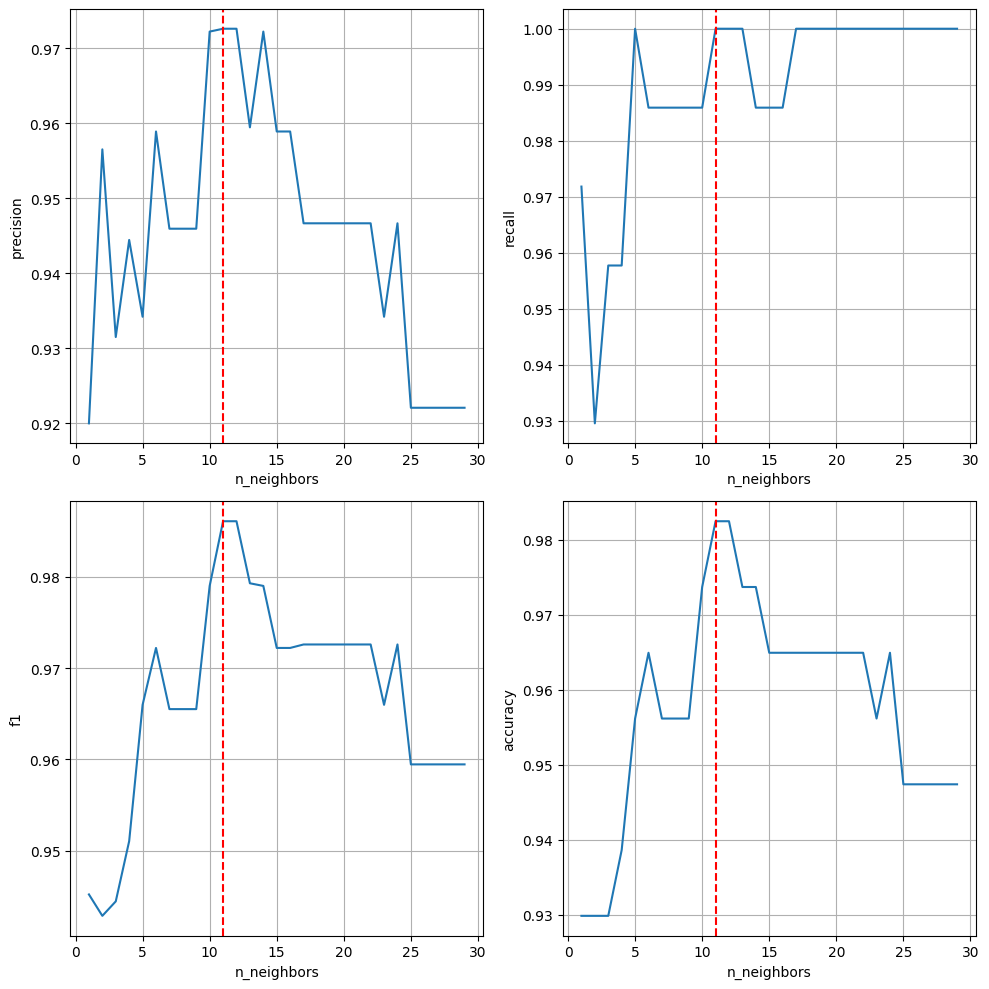

In [3]:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

knn_classifier = KNeighborsClassifier()

tuning_classifier(X_train=X_train, y_train=y_train, X_valid=X_valid, y_valid=y_valid,
       estimator=knn_classifier, parameter='n_neighbors', min_n=1, max_n=30, step=1)

In [4]:
model = tuning_classifier(X_train=X_train, y_train=y_train, X_valid=X_valid, y_valid=y_valid,
       estimator=knn_classifier, parameter='n_neighbors', min_n=1, max_n=30, step=1, set_parameter=12)

In [5]:
model

KNeighborsClassifier(n_neighbors=12)

# tuning_regressor

Checking model for n_estimators: 100%|██████████| 49/49 [00:01<00:00, 35.27it/s]


Best optimal n_estimators value: 44


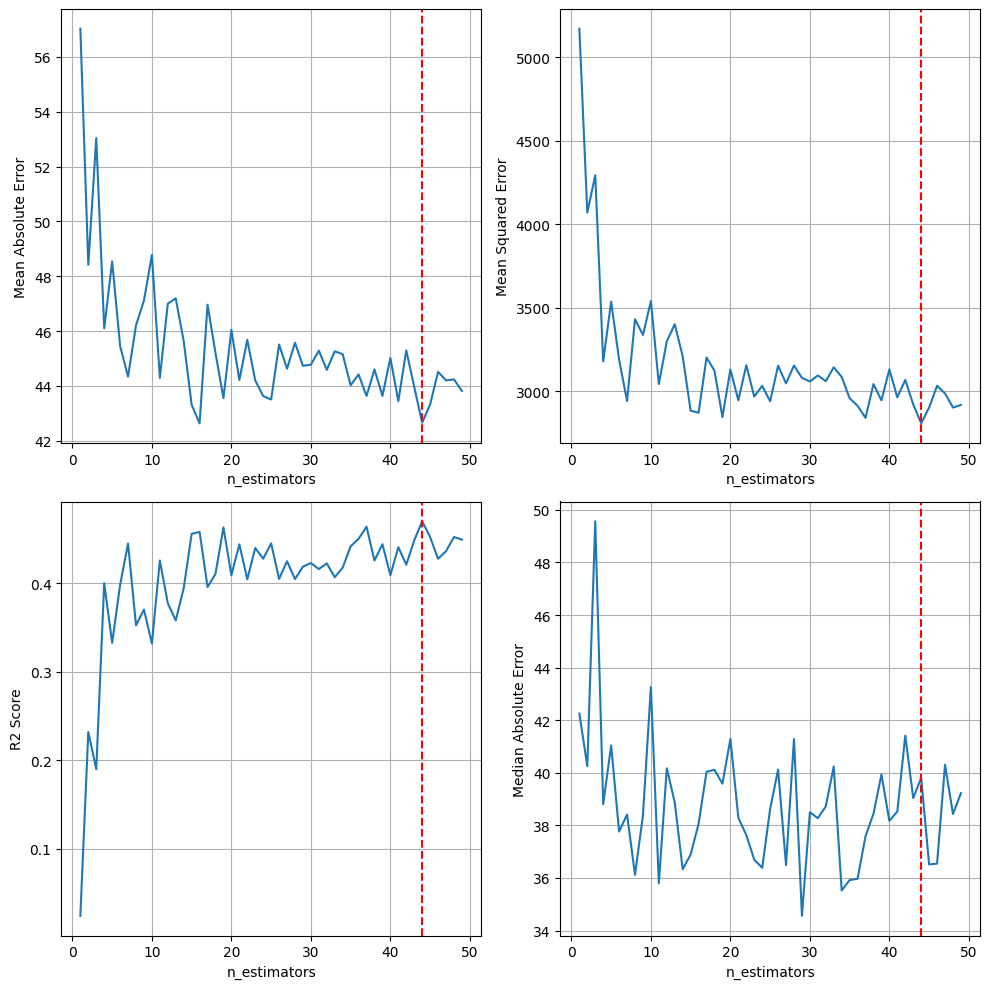

In [6]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

diabetes = load_diabetes()
X_reg, y_reg = diabetes.data, diabetes.target

X_train_reg, X_valid_reg, y_train_reg, y_valid_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

knn_regressor = RandomForestRegressor(
    n_estimators=10,
    min_samples_split=5,
    min_samples_leaf=2,
)

tuning_regressor(X_train=X_train_reg, y_train=y_train_reg, X_valid=X_valid_reg, y_valid=y_valid_reg,
       estimator=knn_regressor, parameter='n_estimators', min_n=1, max_n=50, step=1)

In [8]:
model = tuning_regressor(X_train=X_train_reg, y_train=y_train_reg, X_valid=X_valid_reg, y_valid=y_valid_reg,
       estimator=knn_regressor, parameter='n_estimators', min_n=1, max_n=30, step=1, set_parameter=18)

In [9]:
model

RandomForestRegressor(min_samples_leaf=2, min_samples_split=5, n_estimators=18)